# EDA

In [2]:
#필요라이브러리 다운로드 
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import platform 

#한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

#그래프에서 마이너스 표시되게
matplotlib.rcParams['axes.unicode_minus']=False

### 프리시즌 데이터 분석

In [3]:
#프리시즌 데이터 로드 
pre_df = pd.read_csv('Pre_Season_Batter.csv')
#정규시즌 데이터 로드 
regul_df = pd.read_csv("Regular_Season_Batter.csv")

In [4]:
#데이터 크기 확인
print(pre_df.shape)
#데이터 상단 출력
display(pre_df.head())

(1393, 29)


,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.350,7,20,1,7,1,...,1,0.550,0.409,1,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.959
1,1,강경학,2011,한화,0.000,4,2,2,0,0,...,0,0.000,0.500,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.500
2,1,강경학,2014,한화,-,4,0,2,0,0,...,0,NaN,NaN,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,NaN
3,1,강경학,2015,한화,0.130,10,23,3,3,0,...,0,0.130,0.286,2,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.416
4,1,강경학,2016,한화,0.188,14,32,4,6,1,...,0,0.281,0.212,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.493


In [5]:
#데이터 기초통계량 확인
pre_df.describe()

,batter_id,year,G,AB,R,H,2B,3B,HR,TB,...,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,OPS
count,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,...,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1364.000000,1368.000000,1393.000000,1364.000000
mean,173.434314,2013.014358,8.705671,19.201723,2.679828,5.021536,0.954774,0.119885,0.391960,7.391960,...,0.629576,0.291457,1.877961,0.330223,3.714286,0.447236,0.361012,0.317912,0.381910,0.676924
std,94.716851,4.166757,5.562686,13.395946,2.637212,4.232584,1.196904,0.379976,0.748557,6.538787,...,1.146854,0.595522,2.053392,0.642204,3.180884,0.723364,0.269892,0.151489,0.729521,0.386933
min,0.000000,2002.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.000000,2010.000000,6.000000,9.000000,1.000000,2.000000,0.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.217000,0.250000,0.000000,0.472000
50%,178.000000,2014.000000,9.000000,18.000000,2.000000,4.000000,1.000000,0.000000,0.000000,6.000000,...,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.344500,0.333000,0.000000,0.675000
75%,254.000000,2017.000000,11.000000,28.000000,4.000000,8.000000,2.000000,0.000000,1.000000,11.000000,...,1.000000,0.000000,3.000000,1.000000,5.000000,1.000000,0.478000,0.400000,1.000000,0.867000
max,344.000000,2018.000000,119.000000,183.000000,35.000000,51.000000,11.000000,4.000000,5.000000,68.000000,...,9.000000,4.000000,21.000000,4.000000,36.000000,5.000000,4.000000,1.000000,5.000000,5.000000


<function matplotlib.pyplot.show(close=None, block=None)>

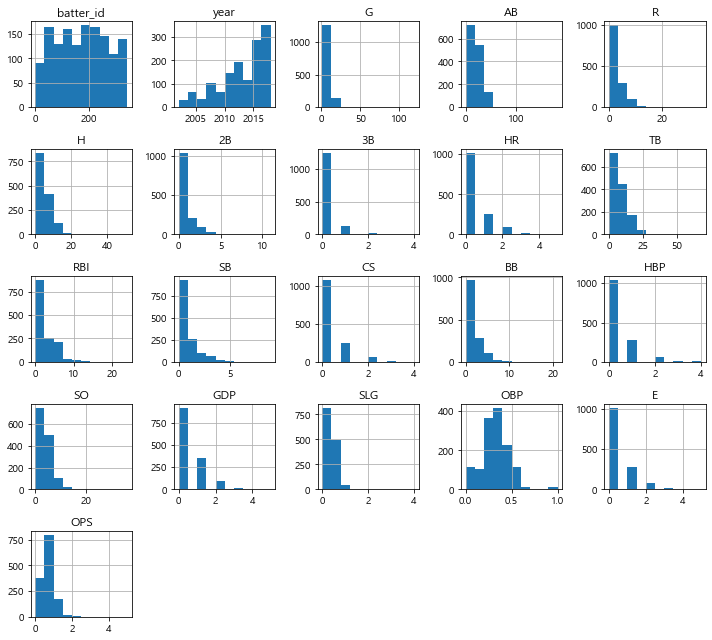

In [6]:
#데이터 시각화
pre_df.hist(figsize=(10,9))
plt.tight_layout() #그래프 간격설정
plt.show

In [7]:
#정규시즌 데이터에서 2002년 이후의 연도별 기록된 선수의 수
regular_count = regul_df.groupby('year')['batter_id'].count().rename('regular')
#프리시즌 데이터에서 연도별 기록된 선수의 수 
pre_count = pre_df.groupby('year')['batter_id'].count().rename('pre')

pd.concat([regular_count,pre_count,np.round(pre_count/regular_count,2).rename('ratio')],axis=1).transpose().loc[:,2002:] #2002년부터 볼꺼임

year,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
regular,43.00,54.00,68.00,73.00,85.00,98.00,115.00,124.00,130.00,151.0,174.0,194.00,186.00,207.00,213.00,217.00,227.0
pre,12.00,19.00,28.00,37.00,36.00,43.00,61.00,66.00,72.00,75.0,87.0,104.00,117.00,134.00,153.00,167.00,182.0
ratio,0.28,0.35,0.41,0.51,0.42,0.44,0.53,0.53,0.55,0.5,0.5,0.54,0.63,0.65,0.72,0.77,0.8


In [8]:
#타자 이름과 연도를 이용해 새로운 인덱스를 생성
regul_df['new_idx'] = regul_df['batter_name'] + regul_df['year'].apply(str)
pre_df['new_idx'] = pre_df['batter_name'] + pre_df['year'].apply(str)

#새로운 인덱스의 교집합
intersection_idx = list(set(regul_df['new_idx']).intersection(pre_df['new_idx']))

#교집합에 존재하는 데이터만 불러오기
regul_new = regul_df.loc[regul_df['new_idx'].apply(lambda x: x in intersection_idx)].copy()
regul_new = regul_new.sort_values(by='new_idx').reset_index(drop=True)

#비교를 위해 인덱스로 정렬
pre_new = pre_df.loc[pre_df['new_idx'].apply(lambda x: x in intersection_idx)].copy()
pre_new = pre_new.sort_values(by='new_idx').reset_index(drop=True)

#검정코드 
print(regul_new.shape, regul_new.shape)
sum(regul_new['new_idx'] == pre_new['new_idx'])

(1358, 30) (1358, 30)


1358

C:\Users\sh921\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


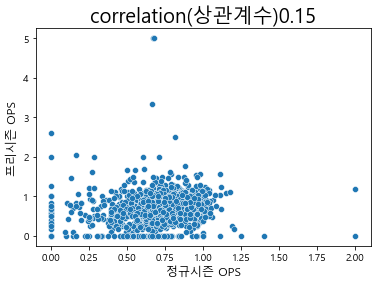

In [9]:
#정규시즌과 프리시즌의 상관관계 계산
correlation = regul_new['OPS'].corr(pre_new['OPS'])
sns.scatterplot(regul_new['OPS'],pre_new['OPS'])
plt.title('correlation(상관계수)' + str(np.round(correlation,2)), fontsize=20)
plt.xlabel('정규시즌 OPS',fontsize=12)
plt.ylabel('프리시즌 OPS',fontsize=12)
plt.show()

#정규시즌과 프리시즌의 성적분포가 선형관계를 띄고 있지 않다. 정규시즌과 프리시즌 데이터가 상관성이 매우 낮음을 확인
#프리시즌 데이터는 수도 작고, 정규시즌과 상관성이 낮기 떄문에 분석에서 제외함

### 정규시즌 데이터 분석

In [10]:
regular = pd.read_csv('Regular_Season_Batter.csv')
display(regular.shape, regular.describe())

(2454, 29)

,batter_id,year,avg,G,AB,R,H,2B,3B,HR,...,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,OPS
count,2454.000000,2454.000000,2428.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,...,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2428.000000,2430.000000,2454.000000,2428.000000
mean,178.079462,2011.614507,0.237559,72.535045,201.514670,29.912388,55.988183,9.863488,0.957620,5.504075,...,5.290139,2.335778,20.943765,3.424613,38.596985,4.603504,0.343826,0.306684,3.676447,0.649939
std,97.557947,4.992833,0.098440,45.093871,169.537029,28.778759,52.253844,9.871314,1.647193,7.989380,...,9.088580,3.194045,21.206113,4.132614,31.801466,4.713531,0.163335,0.111778,4.585248,0.261634
min,0.000000,1993.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,101.250000,2008.000000,0.203000,28.000000,38.250000,5.000000,8.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,3.000000,0.000000,10.000000,1.000000,0.267454,0.272727,0.000000,0.546000
50%,183.000000,2013.000000,0.255000,79.000000,163.000000,21.000000,40.000000,7.000000,0.000000,2.000000,...,2.000000,1.000000,14.000000,2.000000,33.000000,3.000000,0.360124,0.328592,2.000000,0.688637
75%,265.000000,2016.000000,0.291000,115.000000,357.500000,49.000000,100.000000,16.000000,1.000000,8.000000,...,6.000000,3.000000,34.000000,5.000000,60.000000,7.000000,0.436000,0.367000,5.000000,0.797234
max,344.000000,2018.000000,1.000000,144.000000,600.000000,135.000000,201.000000,47.000000,17.000000,53.000000,...,84.000000,21.000000,108.000000,27.000000,161.000000,24.000000,3.000000,1.000000,30.000000,4.000000


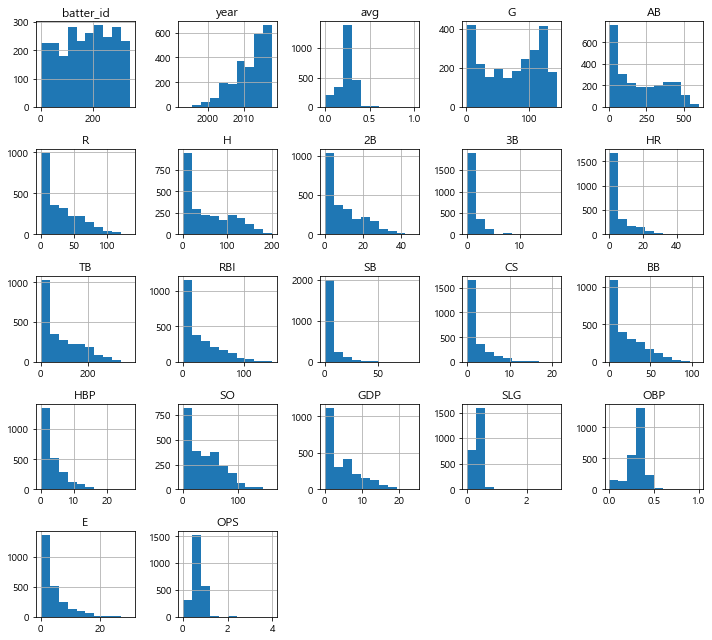

In [11]:
regular.hist(figsize=(10,9))
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

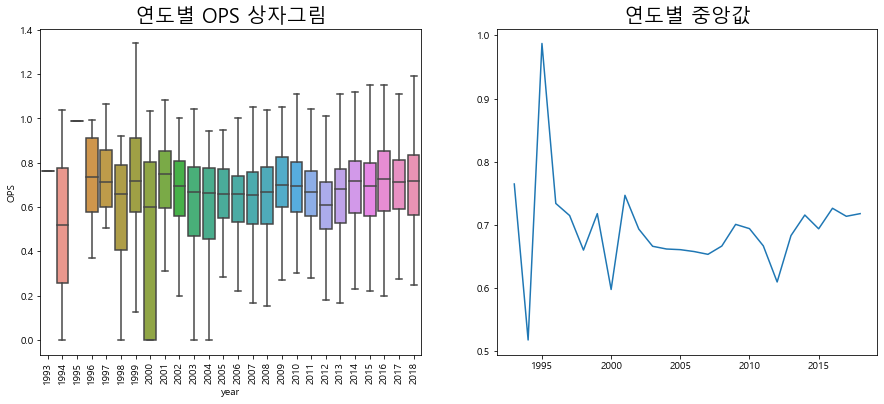

In [12]:
#ops boxplot
plt.figure(figsize=(15,6)) #그래프 크기조정
plt.subplot(1,2,1) 
g = sns.boxplot(x='year', y='OPS', data=regular, showfliers=False)
g.set_title('연도별 OPS 상자그림', size=20)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

plt.subplot(1,2,2)
plt.plot(regular.groupby('year')['OPS'].median())
plt.title('연도별 중앙값', size=20)
plt.show

In [13]:
#연도별 OPS
pd.crosstab(regular['year'],'count').T

year,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
col_0,,,,,,,,,,,,,,,,,,,,,
count,1,2,1,7,8,10,14,20,32,43,...,124,130,151,174,194,186,207,213,217,227


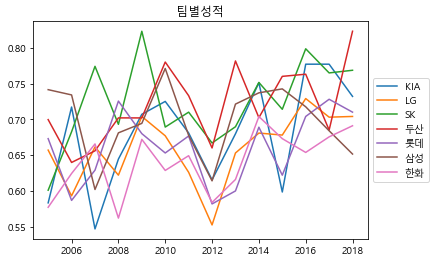

In [14]:
#팀별 OPS

#연도별 팀의 OPS 중앙값 계산
med_OPS_team = regular.pivot_table(index=['team'], columns='year', values='OPS',aggfunc='median')
#2005년 이후에 결측치가 존재하지 않는 팀만 확인
team_idx = med_OPS_team.loc[:,2005:].isna().sum(axis=1)<=0

plt.plot(med_OPS_team.loc[team_idx,2005:].T)
plt.legend(med_OPS_team.loc[team_idx,2005:].T.columns,loc='center left', bbox_to_anchor=(1,0.5))
plt.title('팀별성적')
plt.show()

키와 몸무게와 ops와의 연관성

In [15]:
display(regular['height/weight'])

0       177cm/93kg
1       180cm/72kg
2       180cm/72kg
3       180cm/72kg
4       180cm/72kg
           ...    
2449    181cm/82kg
2450    181cm/82kg
2451    181cm/82kg
2452    181cm/82kg
2453    181cm/82kg
Name: height/weight, Length: 2454, dtype: object

In [16]:
#기존 데이터로부터 키와 몸무게 추출
import re

regular['weight'] = regular['height/weight'].apply(lambda x: int(re.findall('\d+', x.split("/")[1])[0]) if pd.notnull(x) else x)
regular['height'] = regular['height/weight'].apply(lambda x: int(re.findall('\d+', x.split("/")[0])[0]) if pd.notnull(x) else x)

print(regular['height/weight'][0],regular['height'][0], regular['weight'][0])

177cm/93kg 177.0 93.0


C:\Users\sh921\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sh921\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


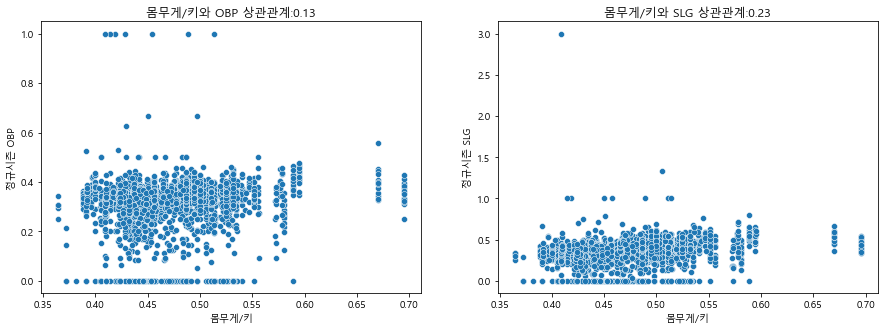

In [17]:
#몸무게 / 키 계산
regular['weight_per_height']= regular['weight']/ regular['height']
plt.figure(figsize=(15,5)) #그래프 크기조정
plt.subplot(1,2,1)

#몸무게와 OBP 상관관계 계산
correlation = regular['weight_per_height'].corr(regular['OBP'])
sns.scatterplot(regular['weight_per_height'], regular['OBP'])
plt.title('몸무게/키와 OBP 상관관계:'+str(np.round(correlation,2)))
plt.ylabel('정규시즌 OBP')
plt.xlabel('몸무게/키')
plt.subplot(1,2,2)

#몸무게와 SLG 상관관계 계산
correlation = regular['weight_per_height'].corr(regular['SLG'])
sns.scatterplot(regular['weight_per_height'], regular['SLG'])
plt.title('몸무게/키와 SLG 상관관계:'+str(np.round(correlation,2)))
plt.ylabel('정규시즌 SLG')
plt.xlabel('몸무게/키')
plt.show()


In [18]:
regular['position'].value_counts()

내야수(우투우타)    643
외야수(우투우타)    230
외야수(좌투좌타)    201
포수(우투우타)     189
외야수(우투좌타)    184
내야수(우투좌타)    141
내야수(좌투좌타)     36
포수(우투좌타)      14
내야수(우투양타)      7
외야수(우투양타)      7
Name: position, dtype: int64

In [19]:
#position : 수비 포지션 분리 
regular['pos']= regular['position'].apply(lambda x: x.split('(')[0] if pd.notnull(x) else x)
#타자가 왼손잡이인지, 오른손잡이인지 분리 () 안 단어
regular['hit_way'] = regular['position'].apply(lambda x: x[-3:-1] if pd.notnull(x) else x)

print(regular['position'][0], regular['pos'][0], regular['hit_way'][0])

내야수(우투우타) 내야수 우타


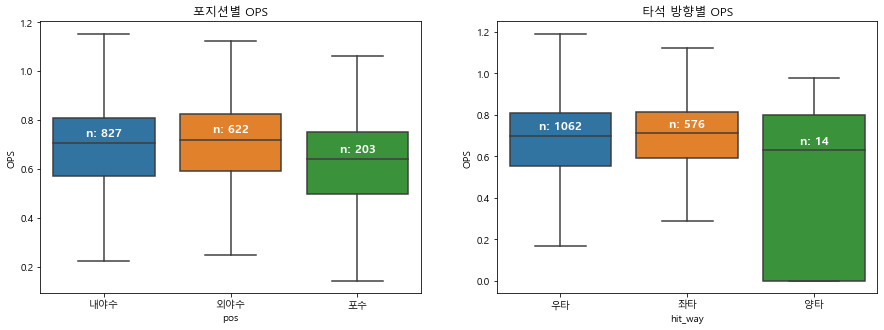

In [20]:
#포지션별 ops와 타석 방향별 OPS
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
ax = sns.boxplot(x='pos',y='OPS',data=regular, showfliers=False)

#position 별 ops 중앙값
medians = regular.groupby(['pos'])['OPS'].median().to_dict()

#positiona 별 관측수
nobs = regular['pos'].value_counts().to_dict()

#키 값을 'n:'값 형식으로 변환
for key in nobs:
    nobs[key]="n: " +str(nobs[key])
    
#그래프의 Xticks text값 얻기
xticks_labels = [item.get_text() for item in ax.get_xticklabels()]

#tick은 tick 위치, label은 그에 해당하는 text 값
for label in ax.get_xticklabels():
    ax.text(xticks_labels.index(label.get_text()),
    medians[label.get_text()] + 0.03, nobs[label.get_text()],
    horizontalalignment='center', size='large',color='w', weight='semibold')
    
ax.set_title('포지션별 OPS')

plt.subplot(1,2,2)
ax = sns.boxplot(x='hit_way', y='OPS', data=regular, showfliers=False)

#타자별 방향별 OPS 중앙값
medians = regular.groupby(['hit_way'])['OPS'].median().to_dict()

#타자방향 관측치 수
nobs = regular['hit_way'].value_counts().to_dict()

#키 값을 'n: '값 형식으로 변환
for key in nobs: nobs[key] = 'n: ' +str(nobs[key])
    
#그래프의 xticks text 값 얻기
xticks_labels = [item.get_text() for item in ax.get_xticklabels()]

#tick은 tick의 위치, label은 그에 해당하는 text 값
for label in ax.get_xticklabels():
    ax.text(xticks_labels.index(label.get_text()), 
    medians[label.get_text()] +0.03, nobs[label.get_text()],
    color='w', weight ='semibold', horizontalalignment='center', size='large')
    
ax.set_title('타석 방향별 OPS')
plt.show()

결과 해석:

내야수와 외야수의 성적은 큰 차이가 없다.

포수의 OPS는 다른 포지션보다 수치가 다소 작은 편

타자가 왼손, 오른손잡이인지 따른 OPS 값은 큰 차이가 없다.\
(양손잡이의 OPS가 다소 낮은 경향이 있으나, 관측치가 13개 밖에 되지 않아 신뢰하기 힘들다.)



In [21]:
#외국인과 내국인 구분
regular['career']

0       쿠바 Ciego de Avila Maximo Gomez Baez(대)
1                            광주대성초-광주동성중-광주동성고
2                            광주대성초-광주동성중-광주동성고
3                            광주대성초-광주동성중-광주동성고
4                            광주대성초-광주동성중-광주동성고
                         ...                  
2449                               석천초-대헌중-공주고
2450                               석천초-대헌중-공주고
2451                               석천초-대헌중-공주고
2452                               석천초-대헌중-공주고
2453                               석천초-대헌중-공주고
Name: career, Length: 2454, dtype: object

In [22]:
#career를 split
foreign_country = regular['career'].apply(lambda x: x.replace('-',' ').split(' ')[0])

#외국만 추출
foreign_country_list = list(set(foreign_country.apply(lambda x: np.nan if '초' in x else x)))

#결측치 처리
foreign_country_list = [x for x in foreign_country_list if str(x) != 'nan']
foreign_country_list

['도미니카', '쿠바', '네덜란드', '캐나다', '미국']

In [23]:
#국적 변수 추가
regular['country'] = foreign_country
regular['country'] = regular['country'].apply(lambda x: x if pd.isnull(x)
                                             else('foreign' if x in foreign_country_list else 'korean'))
regular['country'].head()

0    foreign
1     korean
2     korean
3     korean
4     korean
Name: country, dtype: object

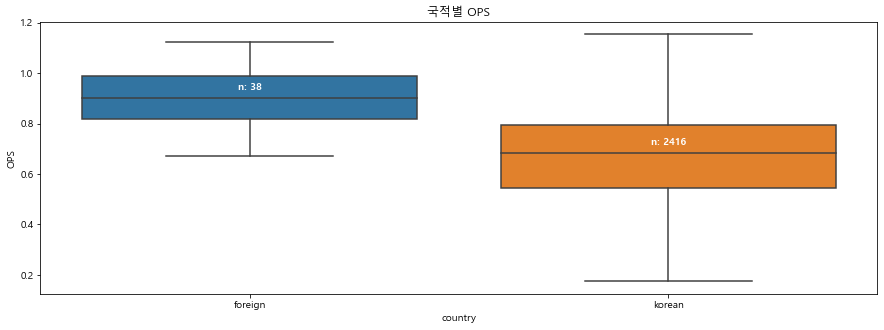

In [24]:
#외국인과 내국인 선수 성적 비교
plt.figure(figsize=(15,5))
ax = sns.boxplot(x='country', y='OPS', data=regular, showfliers=False)

#국적별 ops 중앙값
medians = regular.groupby(['country'])['OPS'].median().to_dict()
#내국인 관측치 수
nobs = regular['country'].value_counts().to_dict()
for key in nobs: nobs[key] = 'n: ' +str(nobs[key])

xticks_labels = [item.get_text() for item in ax.get_xticklabels()]

for label in ax.get_xticklabels():
    ax.text(xticks_labels.index(label.get_text()), medians[label.get_text()] +0.03, nobs[label.get_text()], 
           horizontalalignment='center', color='w', weight='semibold')
ax.set_title('국적별 OPS')
plt.show()


In [25]:
#첫 연봉
regular['starting_salary'].value_counts()

10000만원     177
6000만원      117
3000만원      105
9000만원       97
5000만원       91
8000만원       89
30000만원      74
12000만원      62
4000만원       62
18000만원      54
7000만원       53
11000만원      49
13000만원      48
20000만원      46
25000만원      45
15000만원      41
16000만원      28
14000만원      26
28000만원      20
43000만원      17
45000만원      16
27000만원      15
21000만원      13
23000만원      12
33000만원      10
6500만원       10
100000달러      4
300000달러      3
50000달러       2
17000만원       1
Name: starting_salary, dtype: int64

In [26]:
#초봉과 성적의 상관관계
#결측치라면 그대로 0으로 두고 '만원'이 포함되어 있다면 숫자만 뽑아서 초봉으로 넣어준다. 
#그외 만원 단위가 아닌 초봉은 결측치로 처리한다. 
regular['starting_salary'] = regular['starting_salary'].apply(lambda x: x if pd.isnull(x) 
                                else( int(re.findall('\d+',x)[0]) 
                                     if "만원" in x 
                                     else np.nan))

C:\Users\sh921\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sh921\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


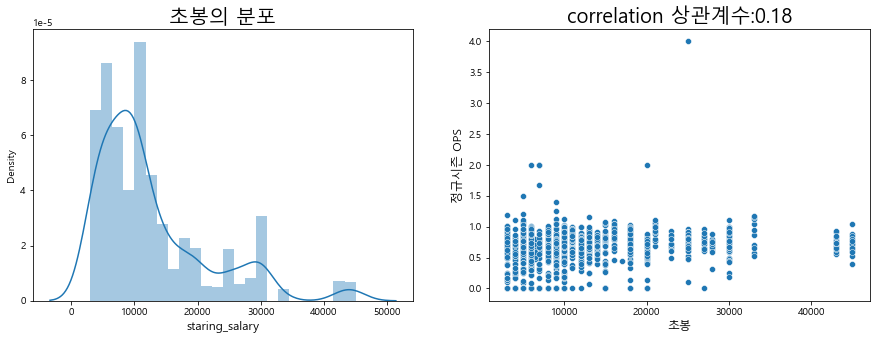

In [27]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
b = sns.distplot(regular['starting_salary'].loc[regular['starting_salary'].notnull()], hist=True)
b.set_xlabel('staring_salary', fontsize=12)
b.set_title('초봉의 분포', fontsize=20)

plt.subplot(1,2,2)
#초봉과 OPS 상관관계 계산
correlation = regular['starting_salary'].corr(regular['OPS'])
b = sns.scatterplot(regular['starting_salary'], regular['OPS'])
b.axes.set_title('correlation 상관계수:' + str(np.round(correlation,2)), fontsize=20)
b.set_ylabel('정규시즌 OPS', fontsize=12)
b.set_xlabel('초봉',fontsize=12)
plt.show()

# 일별 데이터 분석

In [28]:
day = pd.read_csv('Regular_Season_Batter_Day_by_Day_b4.csv')
display(day.shape,day.head())

(112273, 20)

,batter_id,batter_name,date,opposing_team,avg1,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,HBP,SO,GDP,avg2,year
0,0,가르시아,3.24,NC,0.333,3,1,1,0,0,0,0,0,0,1,0,1,0,0.333,2018
1,0,가르시아,3.25,NC,0.000,4,0,0,0,0,0,0,0,0,0,0,1,0,0.143,2018
2,0,가르시아,3.27,넥센,0.200,5,0,1,0,0,0,0,0,0,0,0,0,0,0.167,2018
3,0,가르시아,3.28,넥센,0.200,5,1,1,0,0,0,1,0,0,0,0,0,0,0.176,2018
4,0,가르시아,3.29,넥센,0.250,4,0,1,0,0,0,3,0,0,0,0,0,1,0.190,2018


In [30]:
#날짜를 .을 기준으로 나누고 첫 번째 값을 월(month)로 지정
day['month'] = day['date'].apply(lambda x: str(x).split('.')[0])

#각 연도의 월별 평균 누적타율(avg2) 계산
agg_df = day.groupby(['year','month'])['avg2'].mean().reset_index()

#pivot table을 이용해 데이터 변형
agg_df = agg_df.pivot_table(index=['month'], columns='year', values='avg2')
agg_df

year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
month,,,,,,,,,,,,,,,,,,
10,0.356400,0.269065,0.216583,0.203636,NaN,0.260985,0.249888,0.249638,0.033333,NaN,0.243526,0.246949,0.257841,0.273537,0.274042,0.282547,0.280289,0.277482
3,NaN,NaN,NaN,NaN,NaN,0.261714,0.261714,0.271982,NaN,0.239861,NaN,NaN,0.231236,0.210598,0.214485,0.257857,0.161979,0.238015
4,0.205217,0.319792,0.250296,0.259663,0.235317,0.267106,0.215703,0.261531,0.252546,0.262953,0.247133,0.234199,0.267994,0.259918,0.255175,0.266711,0.259430,0.263953
5,0.297157,0.267990,0.241491,0.237954,0.253527,0.264283,0.237329,0.262535,0.280842,0.272934,0.250877,0.247844,0.268355,0.273899,0.261307,0.275240,0.274374,0.274083
6,0.306926,0.275867,0.252290,0.248800,0.249913,0.264392,0.260600,0.270766,0.278781,0.274791,0.263264,0.254577,0.270533,0.283480,0.268999,0.276307,0.279060,0.280630
7,0.293171,0.266650,0.244230,0.251973,0.256396,0.262464,0.259171,0.264870,0.275054,0.265501,0.264829,0.261513,0.262812,0.275677,0.272685,0.283192,0.284565,0.280817
8,0.303489,0.270481,0.252319,0.249460,0.243570,0.265369,0.270258,0.265173,0.271796,0.271075,0.262048,0.258069,0.268122,0.282025,0.272377,0.283105,0.283283,0.283923
9,0.308636,0.248333,0.243780,0.203953,0.237058,0.258794,0.251022,0.252942,0.264468,0.265312,0.258500,0.251232,0.260571,0.272411,0.271629,0.276513,0.273213,0.277841


year,2011,2012,2013,2014,2015,2016,2017,2018
month,,,,,,,,
4,0.247133,0.234199,0.267994,0.259918,0.255175,0.266711,0.259430,0.263953
5,0.250877,0.247844,0.268355,0.273899,0.261307,0.275240,0.274374,0.274083
6,0.263264,0.254577,0.270533,0.283480,0.268999,0.276307,0.279060,0.280630
7,0.264829,0.261513,0.262812,0.275677,0.272685,0.283192,0.284565,0.280817
8,0.262048,0.258069,0.268122,0.282025,0.272377,0.283105,0.283283,0.283923
9,0.258500,0.251232,0.260571,0.272411,0.271629,0.276513,0.273213,0.277841


<function matplotlib.pyplot.show(close=None, block=None)>

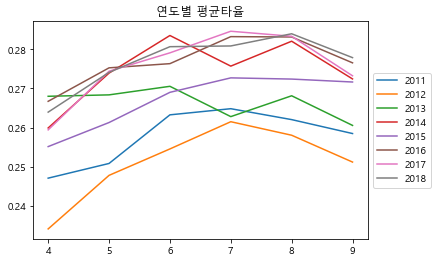

In [31]:
#연도별 평균 타율
display(agg_df.iloc[2:,10:])
plt.plot(agg_df.iloc[2:,10:])
plt.legend(agg_df.iloc[2:,10:].columns, loc='center left', bbox_to_anchor=(1,0.5))
plt.title('연도별 평균타율')
plt.show

탐색적 데이터 분석 요약

1. 프리시즌 데이터는 사용하지 않음(양 충분x, 상관관계 낮음)
2. 정규 시즌 데이터에서 OPS가 외국인 여부에 따라 다르게 분포함을 파악함
3. 정규시즌의 일별데이터에서 OPS 성적의 평균이 월별로 달라지고, 7월 이후에 성적이 수렴되는 것을 확인

# 데이터 전처리

## 결측치 처리 및 데이터 오류 처리

In [32]:
#결측치 개수 확인
pd.DataFrame(regular.isna().sum()).transpose()

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,position,career,starting_salary,OPS,weight,height,weight_per_height,pos,hit_way,country
0,0,0,0,0,26,0,0,0,0,0,...,802,0,1076,26,802,802,802,802,802,0


In [33]:
#수치형 타입의 변수 저장
numerics = ['int16', 'int32','int64','float16','float32','float64']
num_cols = regular.select_dtypes(include=numerics).columns

#수치형 타입 변수 중 결측치가 하나라도 존재하는 행 출력
regular.loc[regular[num_cols].isna().sum(axis=1)>0, num_cols].head()

,batter_id,year,avg,G,AB,R,H,2B,3B,HR,...,SO,GDP,SLG,OBP,E,starting_salary,OPS,weight,height,weight_per_height
0,0,2018,0.339,50,183,27,62,9,0,8,...,25,3,0.519000,0.383000,9,NaN,0.902000,93.0,177.0,0.525424
12,138,2005,0.127,39,63,9,8,2,0,0,...,15,1,0.158730,0.256757,3,NaN,0.415487,NaN,NaN,NaN
13,138,2006,0.139,37,36,6,5,2,0,0,...,14,0,0.194444,0.326087,4,NaN,0.520531,NaN,NaN,NaN
14,138,2007,0.000,8,4,3,0,0,0,0,...,2,1,0.000000,0.000000,0,NaN,0.000000,NaN,NaN,NaN
15,138,2008,0.000,2,1,0,0,0,0,0,...,0,0,0.000000,0.000000,0,NaN,0.000000,NaN,NaN,NaN


In [34]:
#정규시즌 데이터의 수치형 변수 결측치를 0으로 대체 
regular[regular.select_dtypes(include=numerics).columns]= regular[regular.select_dtypes(include=numerics).columns].fillna(0)
regular

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,position,career,starting_salary,OPS,weight,height,weight_per_height,pos,hit_way,country
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,...,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),0.0,0.902,93.0,177.0,0.525424,내야수,우타,foreign
1,1,강경학,2011,한화,0.000,2,1,0,0,0,...,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000.0,0.000,72.0,180.0,0.400000,내야수,좌타,korean
2,1,강경학,2014,한화,0.221,41,86,11,19,2,...,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000.0,0.686,72.0,180.0,0.400000,내야수,좌타,korean
3,1,강경학,2015,한화,0.257,120,311,50,80,7,...,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000.0,0.673,72.0,180.0,0.400000,내야수,좌타,korean
4,1,강경학,2016,한화,0.158,46,101,16,16,3,...,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000.0,0.489,72.0,180.0,0.400000,내야수,좌타,korean
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2449,344,황진수,2014,롯데,0.000,5,5,0,0,0,...,내야수(우투양타),석천초-대헌중-공주고,4000.0,0.000,82.0,181.0,0.453039,내야수,양타,korean
2450,344,황진수,2015,롯데,0.000,2,2,0,0,0,...,내야수(우투양타),석천초-대헌중-공주고,4000.0,0.000,82.0,181.0,0.453039,내야수,양타,korean
2451,344,황진수,2016,롯데,0.000,11,10,2,0,0,...,내야수(우투양타),석천초-대헌중-공주고,4000.0,0.000,82.0,181.0,0.453039,내야수,양타,korean
2452,344,황진수,2017,롯데,0.291,60,117,18,34,6,...,내야수(우투양타),석천초-대헌중-공주고,4000.0,0.761,82.0,181.0,0.453039,내야수,양타,korean


In [35]:
#일별 데이터에서 수치형 변수의 결측치를 모두 0으로 대체
day[day.select_dtypes(include=numerics).columns]= day[day.select_dtypes(include=numerics).columns].fillna(0)
day

,batter_id,batter_name,date,opposing_team,avg1,AB,R,H,2B,3B,...,RBI,SB,CS,BB,HBP,SO,GDP,avg2,year,month
0,0,가르시아,3.24,NC,0.333,3,1,1,0,0,...,0,0,0,1,0,1,0,0.333,2018,3
1,0,가르시아,3.25,NC,0.000,4,0,0,0,0,...,0,0,0,0,0,1,0,0.143,2018,3
2,0,가르시아,3.27,넥센,0.200,5,0,1,0,0,...,0,0,0,0,0,0,0,0.167,2018,3
3,0,가르시아,3.28,넥센,0.200,5,1,1,0,0,...,1,0,0,0,0,0,0,0.176,2018,3
4,0,가르시아,3.29,넥센,0.250,4,0,1,0,0,...,3,0,0,0,0,0,1,0.190,2018,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112268,344,황진수,6.23,LG,-,0,0,0,0,0,...,0,0,0,1,0,0,0,0.158,2018,6
112269,344,황진수,6.26,넥센,0.000,1,0,0,0,0,...,0,0,0,0,0,1,0,0.150,2018,6
112270,344,황진수,6.27,넥센,0.500,2,1,1,1,0,...,0,0,0,0,0,1,0,0.182,2018,6
112271,344,황진수,6.28,넥센,-,0,0,0,0,0,...,0,0,0,0,0,0,0,0.182,2018,6


In [36]:
#프리시즌 데이터에서 수치형변수의 결측치를 0으로 대체 
pre_df[pre_df.select_dtypes(include=numerics).columns] = pre_df[pre_df.select_dtypes(include=numerics).columns].fillna(0)
pre_df

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS,new_idx
0,0,가르시아,2018,LG,0.350,7,20,1,7,1,...,0.550,0.409,1,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.959,가르시아2018
1,1,강경학,2011,한화,0.000,4,2,2,0,0,...,0.000,0.500,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.500,강경학2011
2,1,강경학,2014,한화,-,4,0,2,0,0,...,0.000,0.000,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.000,강경학2014
3,1,강경학,2015,한화,0.130,10,23,3,3,0,...,0.130,0.286,2,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.416,강경학2015
4,1,강경학,2016,한화,0.188,14,32,4,6,1,...,0.281,0.212,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.493,강경학2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1388,342,황재균,2014,롯데,0.407,10,27,3,11,2,...,0.593,0.448,1,183cm/96kg,1987년 07월 28일,내야수(우투우타),사당초-이수중-경기고-현대-우리-히어로즈-넥센-롯데-샌프란시스코,6000만원,1.041,황재균2014
1389,342,황재균,2015,롯데,0.333,11,30,8,10,3,...,0.433,0.389,0,183cm/96kg,1987년 07월 28일,내야수(우투우타),사당초-이수중-경기고-현대-우리-히어로즈-넥센-롯데-샌프란시스코,6000만원,0.822,황재균2015
1390,342,황재균,2016,롯데,0.310,16,42,8,13,3,...,0.429,0.370,1,183cm/96kg,1987년 07월 28일,내야수(우투우타),사당초-이수중-경기고-현대-우리-히어로즈-넥센-롯데-샌프란시스코,6000만원,0.799,황재균2016
1391,342,황재균,2018,KT,0.250,6,16,3,4,1,...,0.500,0.333,3,183cm/96kg,1987년 07월 28일,내야수(우투우타),사당초-이수중-경기고-현대-우리-히어로즈-넥센-롯데-샌프란시스코,6000만원,0.833,황재균2018


In [37]:
#수치형이 아닌 변수의 결측치
#수치형이 아닌 변수 추출
not_num_cols = [x for x in regular.columns if x not in num_cols]

#수치형이 아닌 변수 중 결측치가 하나라도 존재하는 행출력
regular.loc[regular[not_num_cols].isna().sum(axis=1)>0, not_num_cols].head()

,batter_name,team,height/weight,year_born,position,career,pos,hit_way,country
12,백승룡,한화,NaN,1982년 08월 16일,NaN,사직초(부산극동리틀)-사직중-경남상고-경성대-한화-넥센,NaN,NaN,korean
13,백승룡,한화,NaN,1982년 08월 16일,NaN,사직초(부산극동리틀)-사직중-경남상고-경성대-한화-넥센,NaN,NaN,korean
14,백승룡,한화,NaN,1982년 08월 16일,NaN,사직초(부산극동리틀)-사직중-경남상고-경성대-한화-넥센,NaN,NaN,korean
15,백승룡,한화,NaN,1982년 08월 16일,NaN,사직초(부산극동리틀)-사직중-경남상고-경성대-한화-넥센,NaN,NaN,korean
16,백승룡,한화,NaN,1982년 08월 16일,NaN,사직초(부산극동리틀)-사직중-경남상고-경성대-한화-넥센,NaN,NaN,korean


In [38]:
#잘못된 결측 데이터 삭제 

#삭제할 데이터 추출
drop_idx = regular.loc[
    #안타가 0개 이상이면서 장타율이 0인 경우
    ((regular['H']>0)&(regular['SLG']==0)) |
    
    #안타가 0개 이상 혹은 볼넷이 0개 이상 혹은 몸에 맞은 볼이 0개 이상이면서 출루율이 0인 경우
    (((regular['H']>0) |
     (regular['BB']>0) |
    (regular['HBP']>0)) &
    (regular['OBP'] == 0))
].index

#데이터 삭제 
regular = regular.drop(drop_idx).reset_index(drop=True)
regular



,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,position,career,starting_salary,OPS,weight,height,weight_per_height,pos,hit_way,country
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,...,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),0.0,0.902,93.0,177.0,0.525424,내야수,우타,foreign
1,1,강경학,2011,한화,0.000,2,1,0,0,0,...,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000.0,0.000,72.0,180.0,0.400000,내야수,좌타,korean
2,1,강경학,2014,한화,0.221,41,86,11,19,2,...,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000.0,0.686,72.0,180.0,0.400000,내야수,좌타,korean
3,1,강경학,2015,한화,0.257,120,311,50,80,7,...,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000.0,0.673,72.0,180.0,0.400000,내야수,좌타,korean
4,1,강경학,2016,한화,0.158,46,101,16,16,3,...,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000.0,0.489,72.0,180.0,0.400000,내야수,좌타,korean
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2442,344,황진수,2014,롯데,0.000,5,5,0,0,0,...,내야수(우투양타),석천초-대헌중-공주고,4000.0,0.000,82.0,181.0,0.453039,내야수,양타,korean
2443,344,황진수,2015,롯데,0.000,2,2,0,0,0,...,내야수(우투양타),석천초-대헌중-공주고,4000.0,0.000,82.0,181.0,0.453039,내야수,양타,korean
2444,344,황진수,2016,롯데,0.000,11,10,2,0,0,...,내야수(우투양타),석천초-대헌중-공주고,4000.0,0.000,82.0,181.0,0.453039,내야수,양타,korean
2445,344,황진수,2017,롯데,0.291,60,117,18,34,6,...,내야수(우투양타),석천초-대헌중-공주고,4000.0,0.761,82.0,181.0,0.453039,내야수,양타,korean


### 규정타수 정의

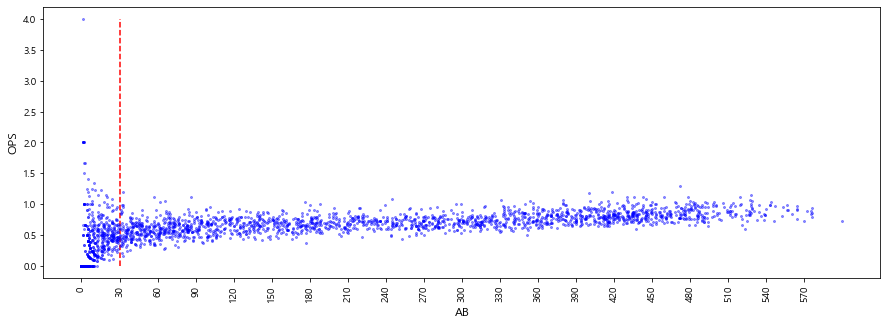

In [39]:
#타수에 따른 OPS 수치를 시각화
plt.figure(figsize=(15,5))
plt.plot("AB",'OPS',data=regular, linestyle='none', marker='o', markersize=2, color='blue', alpha=0.4)
plt.xlabel('AB', fontsize=12)
plt.ylabel('OPS', fontsize=12)
plt.xticks(list(range(min(regular['AB']), max(regular['AB']), 30)),rotation=90)
plt.vlines(30, ymin=min(regular['OPS']), ymax=max(regular['OPS']),linestyles='dashed', colors='r')

plt.show()

In [40]:
#이상치를 탐색
#OPS 이상치 탐색을 위한 수치 정의
Q1 = regular['OPS'].quantile(0.25)
Q3 = regular['OPS'].quantile(0.75)
IQR = Q3 -Q1

#실제 OPS 이상치 탐색
regular.loc[(regular['OPS']<(Q1 -1.5*IQR)) |
           (regular['OPS']>(Q3 +1.5*IQR))].sort_values(by=['AB'],axis=0, ascending=False)[['batter_name','AB','year','OPS']].head(10)

,batter_name,AB,year,OPS
2329,테임즈,472,2015,1.293656
97,강정호,418,2014,1.200156
1318,유재신,33,2018,1.192000
416,김원섭,25,2005,0.116923
1543,이여상,22,2013,0.090909
681,문규현,18,2007,0.109000
578,김회성,17,2010,0.105000
1902,정병곤,15,2018,0.130000
1874,정경운,15,2018,0.130000
2384,현재윤,15,2014,1.229167


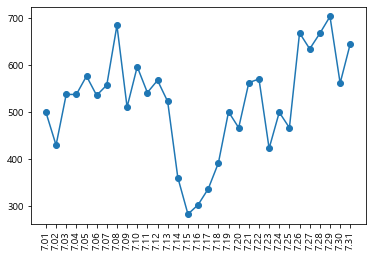

In [41]:
#상반기 기간 정의
#7월 한달 동안 경기를 뛴 선수들의 수의 합

#7.01~7.31 숫자 생성 후 반올림
major_ticks = list(np.round(np.linspace(7.01,7.31,31),2))

july = (day['date']>=7) & (day['date']<8) #7월만 불러오는 index
plt.plot(major_ticks, day['date'].loc[july].value_counts().sort_index(), marker='o')
plt.xticks(major_ticks, rotation=90)
plt.show()

7.14~7.18은 다른 날짜와 달리 확연하게 경기 수가 적음.\
7.18을 기준으로 상반기와 하반기로 나눔.

### 시간변수

In [61]:
#과거 성적은 통합하는 함수
#시간변수를 생성하는 함수 정의
def lag_function(df, var_name, past):
    #df = 시간변수를 생성할 데이터 프레임
    #var_name = 시간변수 생성의 대상이 되는 이름
    #past = 몇년 전의 성적을 생성할 지 결정(정수형)
    
    df.reset_index(drop=True, inplace=True)
    
    #시간변수 생성
    df['lag' + str(past) +'_'+var_name]=np.nan;
    df['lag' + str(past) +'_'+ 'AB']=np.nan
    
    
    for col in ['AB', var_name]:
        for i in range(0,(max(df.index)+1)):
            val = df.loc[(df['batter_name']==df['batter_name'][i]) & 
                         (df['year']==df['year'][i]-past),col]
            #과거 기록이 결측치가 아니라면 값을 넣기
            if (len(val) != 0):
                df.loc[i, 'lag' +str(past)+'_'+col] = val.iloc[0]
                
    #30타수 미만 결측치 처리
    df.loc[df['lag'+str(past)+'_'+'AB']<30,
          'lag' +str(past)+'_'+var_name] = np.nan
    df.drop('lag' +str(past) +'_'+ 'AB', axis=1, inplace=True)
    
    return df

### 변수 선택 & 시간범위

과거의 성적을 통해 수치를 예측 -> 어떤 성적을 이용할 것인지? 과거를 얼마나 이용해야할지? 를 결정해야함\
상관관계를 기반으로 필요한 변수를 선택하고 기간을 설정

<ipython-input-64-c3d886bf2c99>:25: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_matrix, dtype=np.bool)


Text(0.5, 1.0, 'Diagonal Correlation HeatMap')

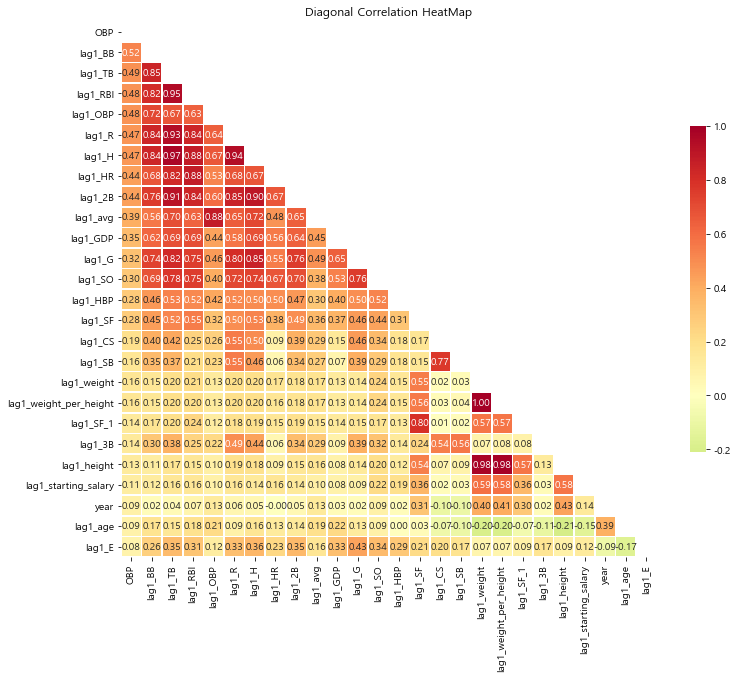

In [64]:
# 상관관계를 탐색할 변수 선택
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_cols = list(regular.select_dtypes(include=numerics).drop(
    ['batter_id','year','OPS','SLG'], axis =1).columns)
regular_temp = regular[numeric_cols + ['year', 'batter_name']].copy()
regular_temp = regular_temp.loc[regular_temp['AB'] >= 30]

# 시간변수 생성 함수를 통한 지표별 1년 전 성적 추출
for col in numeric_cols:
    regular_temp = lag_function(regular_temp, col, 1)

numeric_cols.remove('OBP')
regular_temp.drop(numeric_cols, axis = 1, inplace= True)

# 상관관계 도출
corr_matrix = regular_temp.corr()
corr_matrix = corr_matrix.sort_values(by = 'OBP', axis = 0, ascending=False)
corr_matrix = corr_matrix[corr_matrix.index]

# 상관관계의 시각적 표현
f, ax = plt.subplots(figsize=(12, 12))
corr = regular_temp.select_dtypes(exclude=["object","bool"]).corr()

# 대각 행렬을 기준으로 한 쪽만 나타나게 설정해줍니다.
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

g = sns.heatmap(corr_matrix, cmap='RdYlGn_r', vmax= 1, mask=mask, 
center=0, annot=True, fmt='.2f', square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Diagonal Correlation HeatMap")

In [45]:
#희생 플라이 구하기
#OBP(출루율) 계산 공식을 이용하여 SF(희생 플라이) 계산 >> (H+BB+HBP)/OBP-(AB+BB+HBP)

regular['SF'] = regular[['H','BB','HBP']].sum(axis=1) / regular['OBP'] - regular[['AB','BB','HBP']].sum(axis=1)
regular['SF'].fillna(0,inplace=True)
regular['SF']= regular['SF'].apply(lambda x: round(x,0))

#한 타수당 평균 희생 플라이 계산 후 필요한 것만 추출
regular['SF_1']= regular['SF'] / regular['AB']
regular_sf = regular[['batter_name','year','SF_1']]
regular_sf

,batter_name,year,SF_1
0,가르시아,2018,0.032787
1,강경학,2011,0.000000
2,강경학,2014,-0.000000
3,강경학,2015,0.009646
4,강경학,2016,0.009901
...,...,...,...
2442,황진수,2014,0.000000
2443,황진수,2015,0.000000
2444,황진수,2016,0.000000
2445,황진수,2017,0.008547


In [46]:
#선수별 출루율
#day 에서 연도별 선수의 시즌 상반기 출루율과 관련된 성적 합 구하기
sum_OBP = day.loc[day['date']<=7.18].groupby(['batter_name', 'year'])['AB','H','BB','HBP'].sum().reset_index()

#day와 regular 에서 구한 희생 플라이 관련 데이터 합치기
sum_OBP = sum_OBP.merge(regular_sf, how='left', on=['batter_name','year'])

#선수별 상반기 희생 플라이수 계산
sum_OBP['SF'] = (sum_OBP['SF_1'] * sum_OBP['AB']).apply(lambda x: round(x,0))
sum_OBP.drop('SF_1', axis=1, inplace=True)

#선수별 상반기 OBP(출루율) 계산
sum_OBP['OBP'] = sum_OBP[['H','BB','HBP']].sum(axis=1) / sum_OBP[['AB','BB','HBP','SF']].sum(axis=1)

#OBP 결측치를 0으로 처리
sum_OBP['OBP'].fillna(0, inplace=True)

#분석에 필요하지 않은 열 제거
sum_OBP = sum_OBP[['batter_name','year','AB','OBP']]
sum_OBP

<ipython-input-46-243cb89d2729>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sum_OBP = day.loc[day['date']<=7.18].groupby(['batter_name', 'year'])['AB','H','BB','HBP'].sum().reset_index()


,batter_name,year,AB,OBP
0,가르시아,2018,85,0.418367
1,강경학,2011,1,0.000000
2,강경학,2014,0,1.000000
3,강경학,2015,156,0.342541
4,강경학,2016,81,0.222222
...,...,...,...,...
1381,황진수,2012,4,0.400000
1382,황진수,2013,0,0.000000
1383,황진수,2016,9,0.000000
1384,황진수,2017,71,0.316456


### 추가 변수 생성

In [47]:
regular['year_born'].head()

0    1985년 04월 12일
1    1992년 08월 11일
2    1992년 08월 11일
3    1992년 08월 11일
4    1992년 08월 11일
Name: year_born, dtype: object

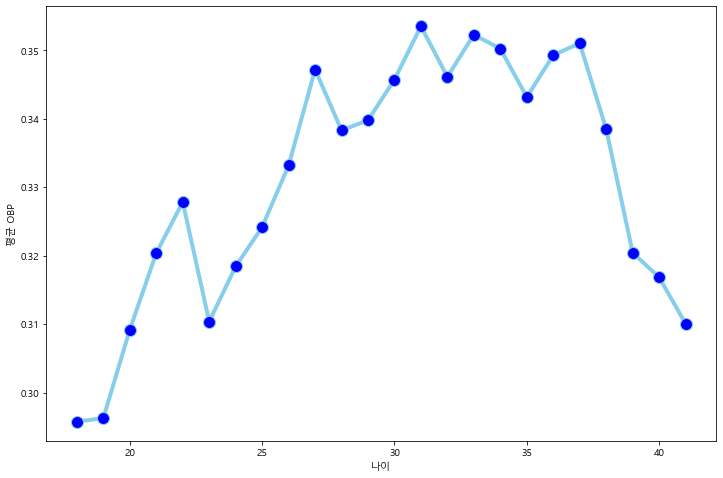

In [48]:
#나이에 따른 성적 변화
#나이 변수 생성
regular['age'] = regular['year'] - regular['year_born'].apply(lambda x: int(x[:4]))

#나이, 평균 출루율, 출루율 중앙값으로 구성된 데이터 프레임 구축
temp_df = regular.loc[regular['AB']>=30].groupby('age').agg({'OBP': ['mean','median']}).reset_index()
temp_df.columns = temp_df.columns.droplevel()
temp_df.columns = ['age','mean_OBP', 'median_OBP']

#나이에 따른 출루율 추이 변화
plt.figure(figsize=(12,8))
plt.plot('age','mean_OBP', data = temp_df, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)

plt.ylabel('평균 OBP')
plt.xlabel('나이')
plt.show()


In [49]:
#나이변수 추가
sum_OBP = sum_OBP.merge(regular[['batter_name','year','age']], how ='left', on=['batter_name','year'])

#총 3년전 성적까지 변수를 생성
sum_OBP = lag_function(sum_OBP, 'OBP', 1)
sum_OBP = lag_function(sum_OBP, 'OBP', 2)
sum_OBP = lag_function(sum_OBP, 'OBP', 3)
sum_OBP

,batter_name,year,AB,OBP,age,lag1_OBP,lag2_OBP,lag3_OBP
0,가르시아,2018,85,0.418367,33,NaN,NaN,NaN
1,강경학,2011,1,0.000000,19,NaN,NaN,NaN
2,강경학,2014,0,1.000000,22,NaN,NaN,NaN
3,강경학,2015,156,0.342541,23,NaN,NaN,NaN
4,강경학,2016,81,0.222222,24,0.342541,NaN,NaN
...,...,...,...,...,...,...,...,...
1381,황진수,2012,4,0.400000,23,NaN,NaN,NaN
1382,황진수,2013,0,0.000000,24,NaN,NaN,NaN
1383,황진수,2016,9,0.000000,27,NaN,NaN,NaN
1384,황진수,2017,71,0.316456,28,NaN,NaN,NaN


### 데이터 사후 처리 
모델 생성에 들어갈 수 있는 지 확인하기 위해 결측치 확인

In [50]:
#결측치 확인
round(sum_OBP[['lag1_OBP','lag2_OBP','lag3_OBP']].isna().sum() / sum_OBP.shape[0],2)

lag1_OBP    0.41
lag2_OBP    0.54
lag3_OBP    0.61
dtype: float64

변수 과정에서 생긴 결측치가 너무 많음 -> 삭제하거나 0으로 처리하는 것은 타당하지 않음\
해결방법
1. 선수별 출루율의 평균치를 구한다. 
2. 시즌별 출루율의 평균치를 구한다. 

In [54]:
#평균 수치를 결측치 대신 삽입
#1. 선수별 OBP 평균
#SF = (H+BB+HBP) + OBP-(AB+BB+HBP)
#OBP = (H+BB+HBP) /(AB+BB+HBP+SF)
player_mean = regular.loc[regular['AB']>=30].groupby('batter_name')['AB','H','BB','HBP','SF'].sum().reset_index()
player_mean['mean_OBP'] = player_mean[['H','BB','HBP']].sum(axis=1) / player_mean[['AB','BB','HBP','SF']].sum(axis=1)

#시즌별 OBP 평균
season_mean = regular.loc[regular['AB']>=30].groupby('year')['AB','H','BB','HBP','SF'].sum().reset_index()
season_mean['mean_OBP'] = season_mean[['H','BB','HBP']].sum(axis=1) / season_mean[['AB','BB','HBP','SF']].sum(axis=1)
season_mean = season_mean[['year','mean_OBP']]

#player_obp_mean(선수평균) 열 추가
sum_OBP = sum_OBP.merge(player_mean[['batter_name','mean_OBP']], how='left',on='batter_name')
sum_OBP = sum_OBP.loc[~sum_OBP['mean_OBP'].isna()].reset_index(drop=True)
sum_OBP

<ipython-input-54-bb9362e4999b>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  player_mean = regular.loc[regular['AB']>=30].groupby('batter_name')['AB','H','BB','HBP','SF'].sum().reset_index()
<ipython-input-54-bb9362e4999b>:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  season_mean = regular.loc[regular['AB']>=30].groupby('year')['AB','H','BB','HBP','SF'].sum().reset_index()


,batter_name,year,AB,OBP,age,lag1_OBP,lag2_OBP,lag3_OBP,mean_OBP
0,가르시아,2018,85,0.418367,33,NaN,NaN,NaN,0.383495
1,강경학,2011,1,0.000000,19,NaN,NaN,NaN,0.337880
2,강경학,2014,0,1.000000,22,NaN,NaN,NaN,0.337880
3,강경학,2015,156,0.342541,23,NaN,NaN,NaN,0.337880
4,강경학,2016,81,0.222222,24,0.342541,NaN,NaN,0.337880
...,...,...,...,...,...,...,...,...,...
1347,황진수,2012,4,0.400000,23,NaN,NaN,NaN,0.358779
1348,황진수,2013,0,0.000000,24,NaN,NaN,NaN,0.358779
1349,황진수,2016,9,0.000000,27,NaN,NaN,NaN,0.358779
1350,황진수,2017,71,0.316456,28,NaN,NaN,NaN,0.358779


In [55]:
#결측치 처리 함수 정의
def lag_na_fill(dataset, varname, past, season_var_mean_data):
    #dataset: 이용할 데이터 셋
    #varname: 시간변수를 만들 변수 이름
    #past: 몇 년전 변수를 만들지 결정
    #season_var_mean_data: season별로 var_name의 평균을 구한 데이터
    
    for i in range(0,len(dataset)):
        if np.isnan(dataset['lag'+str(past)+'_'+varname][i]):
            dataset.loc[i,['lag'+str(past)+'_'+varname]] = (
            dataset['mean'+'_'+varname][i]+ season_var_mean_data.loc[
            season_var_mean_data['year'] == (dataset['year'][i] - past),
            'mean_'+varname].iloc[0]
            )/2
            
    return dataset

In [56]:
#OBP 결측치 처리
#생성한 함수를 이용해 결측치 처리 진행
sum_OBP = lag_na_fill(sum_OBP,'OBP',1,season_mean) #1년전 성적 대체 
sum_OBP = lag_na_fill(sum_OBP,'OBP',2,season_mean) #2년전 성적 대체 
sum_OBP = lag_na_fill(sum_OBP,'OBP',3,season_mean) #3년전 성적 대체 
sum_OBP

,batter_name,year,AB,OBP,age,lag1_OBP,lag2_OBP,lag3_OBP,mean_OBP
0,가르시아,2018,85,0.418367,33,0.369982,0.375910,0.373119,0.383495
1,강경학,2011,1,0.000000,19,0.347434,0.348603,0.344259,0.337880
2,강경학,2014,0,1.000000,22,0.346682,0.337511,0.343131,0.337880
3,강경학,2015,156,0.342541,23,0.353425,0.346682,0.337511,0.337880
4,강경학,2016,81,0.222222,24,0.342541,0.353425,0.346682,0.337880
...,...,...,...,...,...,...,...,...,...
1347,황진수,2012,4,0.400000,23,0.353580,0.357883,0.359052,0.358779
1348,황진수,2013,0,0.000000,24,0.347960,0.353580,0.357883,0.358779
1349,황진수,2016,9,0.000000,27,0.360760,0.363874,0.357131,0.358779
1350,황진수,2017,71,0.316456,28,0.363552,0.360760,0.363874,0.358779


### SLG 데이터 전처리

<ipython-input-70-99c585b197c0>:25: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_matrix, dtype=np.bool)


Text(0.5, 1.0, 'Diagonal Correlation HeatMap')

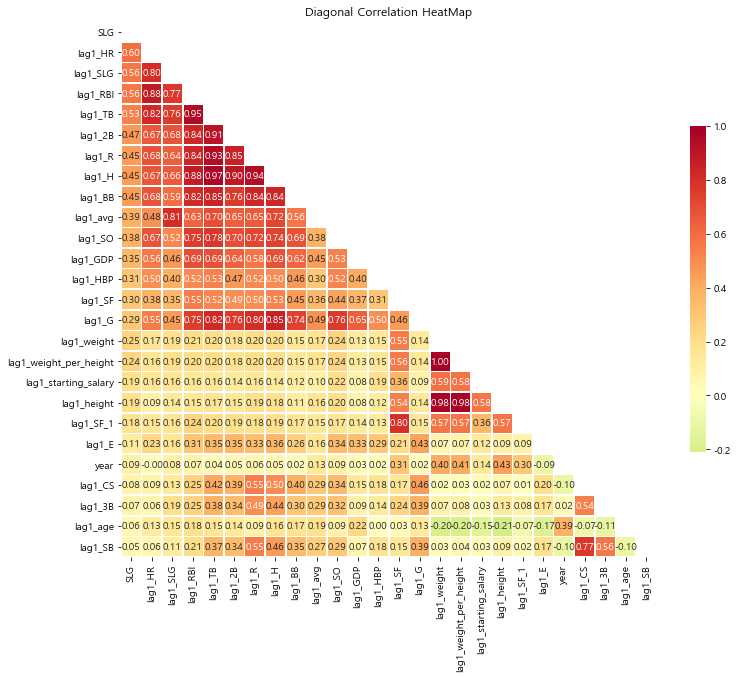

In [70]:
#SLG와 과거 성적의 상관관계
#상관관계를 탐색할 변수 선택
numerics = ['int16','int32','int64','float16','float32','float64']
numeric_cols = list(regular.select_dtypes(include=numerics).drop(['batter_id','year','OPS','OBP'], axis=1).columns)
regular_temp = regular[numeric_cols + ['year','batter_name']].copy()
regular_temp = regular_temp.loc[regular['AB']>=30]

#시간변수 생성 함수를 통한 지표별 1년전 성적 추출
for col in numeric_cols:
    regular_temp = lag_function(regular_temp, col, 1)

numeric_cols.remove('SLG')
regular_temp.drop(numeric_cols, axis=1, inplace=True)
    
#상관관계도출
corr_matrix = regular_temp.corr()
corr_matrix = corr_matrix.sort_values(by='SLG', axis=0, ascending=False)
corr_matrix = corr_matrix[corr_matrix.index]

#상관관계의 시각적 표현
f, ax = plt.subplots(figsize=(12,12))
corr = regular_temp.select_dtypes(exclude=['object','bool']).corr()

# 대각 행렬을 기준으로 한 쪽만 나타나게 설정해줍니다.
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

g = sns.heatmap(corr_matrix, cmap='RdYlGn_r', vmax= 1, mask=mask, 
center=0, annot=True, fmt='.2f', square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Diagonal Correlation HeatMap")

In [69]:
#상반기 SLG
#DAY 에서 연도별 선수의 시즌 상반기 장타율(SLG)과 관련된 성적 합 구하기
sum_slg = day.loc[day['date']<=7.18].groupby(['batter_name','year'])['AB','H','2B','3B','HR'].sum().reset_index()

# 전반기 장타율 계산
sum_slg['SLG'] = \
    (sum_slg['H'] - sum_slg[['2B', '3B', 'HR']].sum(axis=1) +
     sum_slg['2B']*2 + sum_slg['3B']*3 +sum_slg['HR']*4
     ) / sum_slg['AB']

#SLG 결측치를 0으로 처리 
sum_slg['SLG'].fillna(0, inplace=True)

#필요한 칼럼만 불러오고 나이 계산
sum_slg = sum_slg[['batter_name','year','AB','SLG']]
sum_slg = sum_slg.merge(regular[['batter_name','year','age']], how='left',on=['batter_name','year'])
sum_slg.head()

<ipython-input-69-4932961fe6ed>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sum_slg = day.loc[day['date']<=7.18].groupby(['batter_name','year'])['AB','H','2B','3B','HR'].sum().reset_index()


,batter_name,year,AB,SLG,age
0,가르시아,2018,85,0.552941,33
1,강경학,2011,1,0.000000,19
2,강경학,2014,0,0.000000,22
3,강경학,2015,156,0.333333,23
4,강경학,2016,81,0.222222,24


In [72]:
#3년전 성적까지 변수를 생성
sum_slg=lag_function(sum_slg,'SLG',1)
sum_slg=lag_function(sum_slg,'SLG',2)
sum_slg=lag_function(sum_slg,'SLG',3)

sum_slg.head()

round(sum_slg[['lag1_SLG','lag2_SLG','lag3_SLG']].isna().sum() / sum_slg.shape[0],2)

lag1_SLG    0.41
lag2_SLG    0.54
lag3_SLG    0.61
dtype: float64

In [74]:
#과거 SLG 성적 결측치 처리
#선수별 SLG 평균 데이터(player_slg_mean)을 만듬
player_slg_mean = regular.loc[regular['AB']>=30].groupby('batter_name')['AB','H','2B','3B','HR'].sum().reset_index()
player_slg_mean['mean_SLG'] = \
    (player_slg_mean['H'] - player_slg_mean[['2B','3B','HR']].sum(axis = 1) +
     player_slg_mean['2B']*2 + player_slg_mean['3B']*3 + player_slg_mean['HR']*4
    ) / player_slg_mean['AB']

#시즌별 SLG 평균 데이터(seaon_slg_mean)을 만듬
season_SLG_mean = regular.loc[regular['AB'] >= 30].groupby(
    'year')['AB','H','2B','3B','HR'].sum().reset_index()
season_SLG_mean['mean_SLG'] = \
    (season_SLG_mean['H'] - season_SLG_mean[['2B','3B','HR']].sum(axis = 1) + 
     season_SLG_mean['2B']*2 + season_SLG_mean['3B']*3 + season_SLG_mean['HR']*4
    ) / season_SLG_mean['AB']

#선수 평균의 SLG(player_OBP_mean)를 새로운 변수로 한다.
sum_slg = sum_slg.merge(player_slg_mean[['batter_name','mean_SLG']], how='left',on='batter_name')

#선수 평균의 성적이 결측치이면 데이터에서 제거
sum_slg = sum_slg.loc[~sum_slg['mean_SLG'].isna()].reset_index(drop=True)

#결측치 처리
sum_slg = lag_na_fill(sum_slg,'SLG',1,season_SLG_mean)
sum_slg = lag_na_fill(sum_slg,'SLG',2,season_SLG_mean)
sum_slg = lag_na_fill(sum_slg,'SLG',3,season_SLG_mean)

display(sum_slg.head())
round(sum_slg[['lag1_SLG','lag2_SLG','lag3_SLG']].isna().sum()/sum_slg.shape[0],2)

<ipython-input-74-b9ee8b3b2f94>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  player_slg_mean = regular.loc[regular['AB']>=30].groupby('batter_name')['AB','H','2B','3B','HR'].sum().reset_index()
<ipython-input-74-b9ee8b3b2f94>:10: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  season_SLG_mean = regular.loc[regular['AB'] >= 30].groupby(


,batter_name,year,AB,SLG,age,lag1_SLG,lag2_SLG,lag3_SLG,mean_SLG
0,가르시아,2018,85,0.552941,33,0.481855,0.481498,0.476627,0.519126
1,강경학,2011,1,0.000000,19,0.372902,0.380882,0.361716,0.332527
2,강경학,2014,0,0.000000,22,0.362931,0.349344,0.359616,0.332527
3,강경학,2015,156,0.333333,23,0.389415,0.362931,0.349344,0.332527
4,강경학,2016,81,0.222222,24,0.333333,0.389415,0.362931,0.332527


lag1_SLG    0.0
lag2_SLG    0.0
lag3_SLG    0.0
dtype: float64

### 모델 구축과 검증

In [75]:
#데이터 분할
#30타수 이상의 데이터만 학습
sum_OBP = sum_OBP.loc[sum_OBP['AB']>=30]
sum_slg = sum_slg.loc[sum_slg['AB']>=30]

#2018년 데이터를 test 데이터로
#2018년 이전은 train 데이터로 사용
obp_train = sum_OBP.loc[sum_OBP['year'] != 2018]
obp_test = sum_OBP.loc[sum_OBP['year'] == 2018]

slg_train = sum_slg.loc[sum_slg['year'] != 2018]
slg_test = sum_slg.loc[sum_slg['year'] == 2018]

print(obp_train.shape, obp_test.shape, slg_train.shape, slg_test.shape)

(872, 9) (150, 9) (872, 9) (150, 9)


In [92]:
#평가지표 함수 생성
#WRMSE 함수 정의

def wrmse(v,w,p):
    #v: 실제값
    #w: 타수
    #p: 예측값
    return sum(np.sqrt((v-p)**2*w / sum(w)))

### 모델 선택

릿지와 라쏘 회귀모델

In [82]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

#log 단위로, 1.e-04 ~ 1.e+01 사이의 구간에 대해 parameter를 탐색 
lasso_params = {'alpha': np.logspace(-4,1,6)}
ridge_params = {'alpha': np.logspace(-4,1,6)}

#GridSearchCV를 이용하여 dict에 lasso, ridge obp 모델을 저장
obp_linear_models = {'Lasso': GridSearchCV(Lasso(), param_grid=lasso_params).fit(obp_train.iloc[:,-5:], obp_train['OBP']).best_estimator_,
                    'Ridge': GridSearchCV(Ridge(), param_grid=ridge_params).fit(obp_train.iloc[:,-5:], obp_train['OBP']).best_estimator_}

#slg 모델
slg_linear_models = {'Lasso': GridSearchCV(Lasso(), param_grid=lasso_params).fit(slg_train.iloc[:,-5:], slg_train['SLG']).best_estimator_,
                    'Ridge': GridSearchCV(Ridge(), param_grid=ridge_params).fit(slg_train.iloc[:,-5:], slg_train['SLG']).best_estimator_}

랜덤 포레스트

In [100]:
import time
from sklearn.ensemble import RandomForestRegressor
start = time.time() #시작 시간 저장

#parameter 범위 지정
rf_params = {
        'n_estimators': [50,100,150,200,300,500,1000],
    'max_features': ['auto', 'sqrt'],
    'max_depth' : [1,2,3,5,6,10],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 3, 5, 10]}

#gridsearchcv를 이용하여 dict에 obp rf 모델을 저장
obp_rf_model ={'RF': GridSearchCV(RandomForestRegressor(random_state=42), param_grid=rf_params,n_jobs=-1).fit(obp_train.iloc[:,-5:], obp_train['OBP']).best_estimator_}
SLG_RF_models = {
    'RF': GridSearchCV(
        RandomForestRegressor(random_state=42), param_grid=rf_params, n_jobs=-1
        ).fit(slg_train.iloc[:,-5:], slg_train['SLG']).best_estimator_}


print(f'걸린시간: {np.round(time.time() - start,3)} 초') 

걸린시간: 5022.216 초


XGBoost

In [89]:
import xgboost as xgb
start = time.time()

#xgboost parameter space 정의
XGB_parmas = {
    'min_child_weight': [1,3, 5,10],
    'gamma': [0.3,0.5, 1, 1.5, 2, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'max_depth': [3, 4, 5,7,10]    
}

#Gridsearchcv 정의
XGB_obp_gridsearch = GridSearchCV(xgb.XGBRegressor(random_state=42),
                                 param_grid=XGB_parmas, n_jobs=-1)

XGB_slg_gridsearch = GridSearchCV(xgb.XGBRegressor(random_state=42),
                                 param_grid=XGB_parmas, n_jobs=-1)

#모델 학습
XGB_obp_gridsearch.fit(obp_train.iloc[:,-5:], obp_train['OBP'])
XGB_slg_gridsearch.fit(slg_train.iloc[:,-5:], slg_train['SLG'])

print(f'걸린시간: {np.round(time.time() - start,3)}초')

걸린시간: 3876.014초


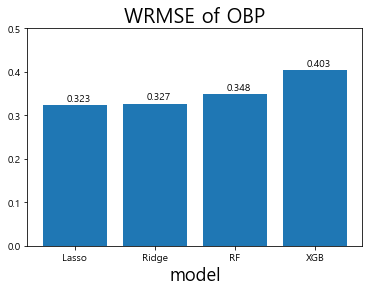

In [96]:
#출루율 예측 모델 성능 비교
#테스트 데이터셋(2018년) 선수들의 obp를 예측
Lasso_OBP = obp_linear_models['Lasso'].predict(obp_test.iloc[:,-5:])
Ridge_OBP = obp_linear_models['Ridge'].predict(obp_test.iloc[:,-5:])
RF_OBP = obp_rf_model['RF'].predict(obp_test.iloc[:,-5:])
XGB_OBP = XGB_obp_gridsearch.predict(obp_test.iloc[:,-5:])

#test 데이터의 WRMSE 계산
wrmse_score = [wrmse(obp_test['OBP'], obp_test['AB'], Lasso_OBP),
              wrmse(obp_test['OBP'], obp_test['AB'], Ridge_OBP),
              wrmse(obp_test['OBP'], obp_test['AB'], RF_OBP),
              wrmse(obp_test['OBP'], obp_test['AB'], XGB_OBP)]

x_lab = ['Lasso','Ridge','RF','XGB']

plt.bar(x_lab, wrmse_score)
plt.title('WRMSE of OBP', fontsize=20)
plt.xlabel('model', fontsize=18)
plt.ylabel('', fontsize=18)
plt.ylim(0,0.5)

#값 표시
for i,v in enumerate(wrmse_score):
    plt.text(i-0.1, v+0.01, str(np.round(v,3)))

plt.show()

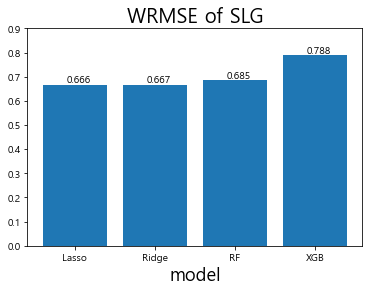

In [105]:
## 장타율 예측모델 성능 비교
#테스트 데이터셋의 선수들의 SLG 를 예측
Lasso_SLG = slg_linear_models['Lasso'].predict(slg_test.iloc[:,-5:])
Ridge_SLG = slg_linear_models['Ridge'].predict(slg_test.iloc[:,-5:])
RF_SLG = SLG_RF_models['RF'].predict(slg_test.iloc[:,-5:])
XGB_SLG = XGB_slg_gridsearch.predict(slg_test.iloc[:,-5:])

#test 데이터의 WRMSE 계산
wrmse_score = [wrmse(slg_test['SLG'], slg_test['AB'], Lasso_SLG),
              wrmse(slg_test['SLG'], slg_test['AB'], Ridge_SLG),
              wrmse(slg_test['SLG'], slg_test['AB'], RF_SLG),
              wrmse(slg_test['SLG'], slg_test['AB'], XGB_SLG)]

x_lab = ['Lasso','Ridge','RF','XGB']

plt.bar(x_lab, wrmse_score)
plt.title('WRMSE of SLG', fontsize=20)
plt.xlabel('model', fontsize=18)
plt.ylabel('', fontsize=18)
plt.ylim(0,0.9)

#값 표시
for i,v in enumerate(wrmse_score):
    plt.text(i-0.1, v+0.01, str(np.round(v,3)))

plt.show()

## 결과 해석 및 평가

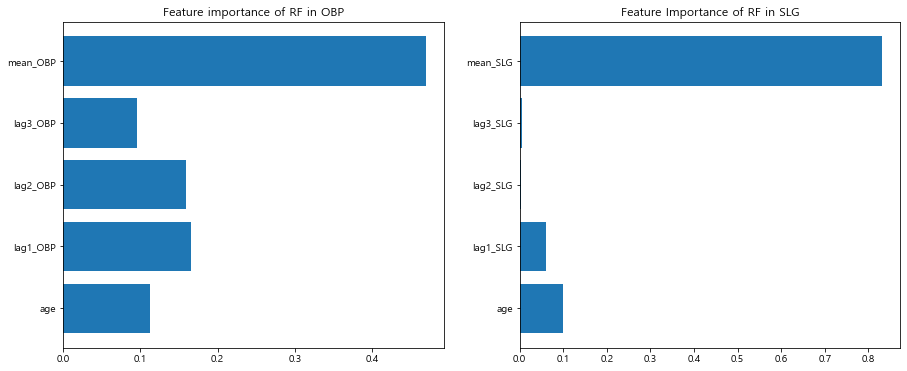

In [107]:
#랜덤 포레스트 모델에서의 변수 중요도
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)

#가로막대 그래프
plt.barh(obp_train.iloc[:,-5:].columns, obp_rf_model['RF'].feature_importances_)

plt.title('Feature importance of RF in OBP')
plt.subplot(1,2,2)
plt.barh(slg_train.iloc[:,-5:].columns, SLG_RF_models['RF'].feature_importances_)
plt.title('Feature Importance of RF in SLG')
plt.show()

In [111]:
#라쏘 모델의 알파값과 선형계수 값
#알파값은 페널티 정도를 의미함

#Lasso에서 GridSearchCV로 탐색한 최적의 alpha 값 출력
print('Alpha: ', obp_linear_models['Lasso'].alpha)

#Lasso model의 선형계수 값 출력
display(pd.DataFrame(obp_linear_models['Lasso'].coef_.reshape(-1,5),
                    columns=obp_train.iloc[:,-5:].columns, index =['coefficient']))

print('Alpha: ', slg_linear_models['Lasso'].alpha)

display(pd.DataFrame(slg_linear_models['Lasso'].coef_.reshape(-1,5),
                    columns=slg_train.iloc[:,-5:].columns, index =['coefficient']))

Alpha:  0.0001


,age,lag1_OBP,lag2_OBP,lag3_OBP,mean_OBP
coefficient,0.003195,0.018249,0.0,0.0,0.864913


Alpha:  0.0001


,age,lag1_SLG,lag2_SLG,lag3_SLG,mean_SLG
coefficient,0.0049,0.081209,0.0,-0.0,0.836453


..

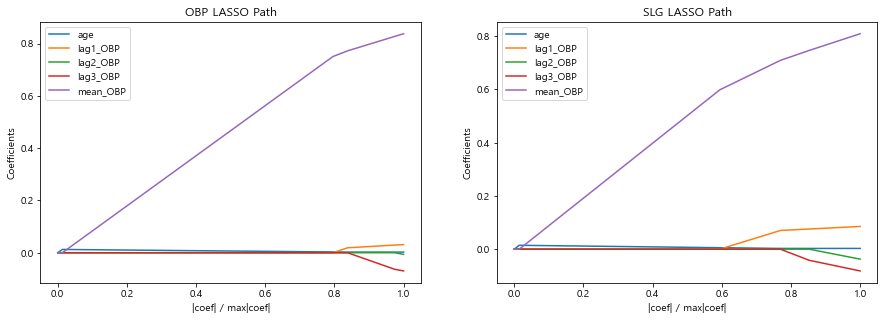

In [115]:
#라쏘 시각화
from sklearn.linear_model import lars_path
plt.figure(figsize=(15,4.8))
plt.subplot(1,2,1)

#OBP 모델의 alpha 값의 변화에 따른 계수의 변화를 alpha, coefs에 저장
alphas, _, coefs = lars_path(obp_train.iloc[:,-5:].values, obp_train['OBP'], method='lasso', verbose=True)

#피처별 alpha 값에 따른 선형 모델 계수의 절댓값의 합
xx = np.sum(np.abs(coefs.T), axis=1)
#계수의 절댓값 중 가장 큰값으로 alpha에 따른 피처의 계수의 합을 나눔
xx /= xx[-1]

plt.plot(xx, coefs.T)
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('OBP LASSO Path')
plt.axis('tight')
plt.legend(obp_train.iloc[:,-5:].columns)

plt.subplot(1,2,2)
alphas, _, coefs = lars_path(slg_train.iloc[:,-5:].values,slg_train['SLG'], method='lasso', verbose=True)
xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.plot(xx, coefs.T)
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('SLG LASSO Path')
plt.axis('tight')
plt.legend(obp_train.iloc[:,-5:].columns)
plt.show()

## 성능 향상을 위한 방법

### 앙상블

In [116]:
#두 모델(라쏘, 랜덤포레스트)의 평균을 이용해 앙상블
print('OBP model averaging: ', wrmse(obp_test['OBP'], obp_test['AB'], (Lasso_OBP + RF_OBP) /2))
print('SLG model aberaging: ', wrmse(slg_test['SLG'], slg_test['AB'], (Lasso_SLG +RF_SLG) /2))

OBP model averaging:  0.3324574652010582
SLG model aberaging:  0.6684541138633259


### 단순화된 모델 생성

In [126]:
#전처리된 데이터를 다른 곳에 저장
sum_OBP_origin = sum_OBP.copy()

#전체 희생타 계산
regular['SF'] = regular[['H','BB','HBP']].sum(axis=1) / regular['OBP'] - regular[['AB','BB','HBP']].sum(axis=1)
regular['SF'].fillna(0, inplace=True)
regular['SF'] = regular['SF'].apply(lambda x: round(x,0))

#한 타수당 평균 희생타 계산 후 필요한 것만 추출
regular['SF_1'] = regular['SF'] / regular['AB']
regular_SF = regular[['batter_name','year','SF_1']]

#DAY에서 연도별 선수의 시즌 전반기 출루율과 관련된 성적 합 구하기 
sum_OBP = day.loc[day['date']<=7.18].groupby(['batter_name','year'])['AB','H','BB','HBP','RBI', '2B', '3B', 'HR'].sum().reset_index()

#day_by_day와 regular season에서 구한 희생타 관련 데이터를 합치기
sum_OBP = sum_OBP.merge(regular_SF, how = 'left',
                                    on=['batter_name','year'])

# 한 타수당 평균 희생타 계산
sum_OBP['SF'] = \
    (sum_OBP['SF_1']*sum_OBP['AB']).apply(lambda x: round(x,0))
sum_OBP.drop('SF_1',axis = 1, inplace = True)

#전반기 OBP(출루율 계산)
sum_OBP['OBP'] = sum_OBP[['H','BB','HBP']].sum(axis=1) / sum_OBP[['AB', 'BB', 'HBP','SF']].sum(axis = 1)
sum_OBP['OBP'].fillna(0, inplace=True)

# TB 계산
sum_OBP['TB'] =  sum_OBP['H'] + sum_OBP['2B']*2 + \
                       sum_OBP['3B']*3 + sum_OBP['HR']*4
sum_OBP = sum_OBP[['batter_name','year','AB','OBP', 'BB', 'TB', 'RBI']]

# 나이 추가
sum_OBP = sum_OBP.merge(regular[['batter_name','year','age']],
                                    how = 'left', on=['batter_name','year'])

# 평균 OBP 추가
sum_OBP = sum_OBP.merge(player_mean[['batter_name', 'mean_OBP']],
                                    how ='left', on="batter_name")
sum_OBP = \
    sum_OBP.loc[~sum_OBP['mean_OBP'].isna()].reset_index(drop=True)

<ipython-input-126-57c1742a71e9>:14: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sum_OBP = day.loc[day['date']<=7.18].groupby(['batter_name','year'])['AB','H','BB','HBP','RBI', '2B', '3B', 'HR'].sum().reset_index()


In [127]:
#모델링에서 사용하는 변수 리스트 지정
# 각 변수에 대한 1년 전 성적 생성
sum_OBP = lag_function(sum_OBP, "BB", 1)
sum_OBP = lag_function(sum_OBP, "TB", 1)
sum_OBP = lag_function(sum_OBP, "RBI", 1)
sum_OBP = lag_function(sum_OBP, "OBP", 1)

sum_OBP = sum_OBP.dropna() # 결측치 포함한 행 제거

# 변수 리스트 지정
feature_list_1 = ['age', 'lag1_OBP', 'mean_OBP']
feature_list_2 = ['age', 'lag1_BB', 'lag1_TB', 'lag1_RBI','lag1_OBP', 'mean_OBP']

In [131]:
#OBP_RF_models_1 = OBP 값만 이용
#OBP_RF_models_2 = 다른 상관관계가 높은 변수 추가

# 학습시킬 데이터 30타수 이상만 학습
sum_OBP= sum_OBP.loc[sum_OBP['AB']>=30] 

# 2018년 test로 나누고 나머지는 학습
OBP_train = sum_OBP.loc[sum_OBP['year'] != 2018]
OBP_test = sum_OBP.loc[sum_OBP['year'] == 2018]

# grid search를 이용해 학습한다.
OBP_RF_models_1 = {
    'RF': GridSearchCV(
        RandomForestRegressor(random_state=42), param_grid=rf_params, n_jobs=-1
        ).fit(OBP_train.loc[:,feature_list_1], OBP_train['OBP']).best_estimator_}

OBP_RF_models_2 = {
    'RF': GridSearchCV(
        RandomForestRegressor(random_state=42), param_grid=rf_params, n_jobs=-1
        ).fit(OBP_train.loc[:,feature_list_2], OBP_train['OBP']).best_estimator_}

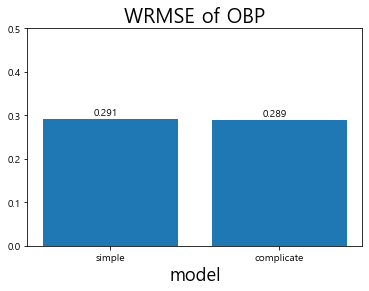

In [132]:
# 예측
RF_OBP_1 = OBP_RF_models_1['RF'].predict(OBP_test.loc[:,feature_list_1])
RF_OBP_2 = OBP_RF_models_2['RF'].predict(OBP_test.loc[:,feature_list_2])

# wrmse 계산
wrmse_score = [wrmse(OBP_test['OBP'],OBP_test['AB'],RF_OBP_1) ,
               wrmse(OBP_test['OBP'],OBP_test['AB'],RF_OBP_2)]
x_lab = ['simple', 'complicate']

plt.bar(x_lab, wrmse_score)
plt.title('WRMSE of OBP', fontsize=20)
plt.xlabel('model', fontsize=18)
plt.ylabel('', fontsize=18)
plt.ylim(0,0.5)
# 막대그래프 위에 값을 표시해준다.
for i, v in enumerate(wrmse_score):
    plt.text(i-0.1, v + 0.01, str(np.round(v,3))) # x 좌표, y좌표, 텍스트 표시
plt.show()

In [135]:
# 최종 제출을 위한 원래 데이터 복구 
sum_OBP = sum_OBP_origin.copy()